Para comenzar a seleccionar las criptomonedas para nuestro analisis vamos a traernos una lista de las mismas ordenadas por su "market cap" y vamos a seleccionar las 10 con mayor capitalizacion de mercado, como dos StableCoins aparecen entre las primeras 10 y estas moendas comunmente no presentan grandes vaciaciones (Su valor siempre esta entorno a un dolar). Vamos a tomar 15 monedas para analizar y luego tomar las 10 que se considere mejores.

In [1]:
from pycoingecko import CoinGeckoAPI
import pandas as pd

def get_top_cryptocurrencies_by_market_cap(limit=15):
    cg = CoinGeckoAPI()
    top_cryptocurrencies = cg.get_coins_markets(vs_currency='usd', order='market_cap_desc', per_page=limit, page=1, sparkline=False)
    return top_cryptocurrencies

# Llamar a la función
top_cryptocurrencies = get_top_cryptocurrencies_by_market_cap()

# Lista de stable coins conocidos (puedes agregar o quitar de esta lista según lo requieras)
stable_coins = ['usdt', 'usdc', 'tusd', 'dai', 'busd', 'pax']

# Separar las criptomonedas en dos listas: una para stable coins y otra para el resto
stable_coins_list = [crypto for crypto in top_cryptocurrencies if crypto['symbol'] in stable_coins]
other_coins_list = [crypto for crypto in top_cryptocurrencies if crypto['symbol'] not in stable_coins]

# Crear una lista solo con los 'id' de las criptomonedas que no son stable coins
other_coins_ids = [crypto['id'] for crypto in other_coins_list]

print("Criptomonedas en el top10 de MarketCap:")
print(other_coins_ids)



Criptomonedas en el top10 de MarketCap:
['bitcoin', 'ethereum', 'binancecoin', 'ripple', 'staked-ether', 'cardano', 'dogecoin', 'solana', 'tron', 'polkadot', 'matic-network', 'the-open-network', 'shiba-inu']


In [2]:
from datetime import datetime, timedelta

def get_historical_price(coin_id, from_timestamp, to_timestamp):
    cg = CoinGeckoAPI()
    price_data = cg.get_coin_market_chart_range_by_id(id=coin_id, vs_currency='usd', from_timestamp=from_timestamp, to_timestamp=to_timestamp)
    return price_data['prices']

cg = CoinGeckoAPI()

# Calcula la fecha desde hace dos años hasta ahora
end_date = datetime.now()
start_date = end_date - timedelta(days=730)

to_timestamp = int(end_date.timestamp())
from_timestamp = int(start_date.timestamp())

# Diccionario para almacenar los precios históricos
historical_prices_dict = {}

# Obtener precios históricos para cada criptomoneda
for coin_id in other_coins_ids:
    historical_prices = get_historical_price(coin_id, from_timestamp, to_timestamp)
    historical_prices_dict[coin_id] = historical_prices

# Crear un DataFrame vacío con las fechas como índice
df = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date).date)

# Llenar el DataFrame con los precios de cada criptomoneda
for coin_id, prices in historical_prices_dict.items():
    for price_data in prices:
        timestamp, price = price_data
        date_str = datetime.utcfromtimestamp(timestamp/1000).date()
        df.at[date_str, coin_id] = price

DF con la evolucion del precio de las 10 criptomonedas

In [ ]:
df

,bitcoin,ethereum,binancecoin,ripple,staked-ether,cardano,dogecoin,solana,tron,polkadot,matic-network,shiba-inu,the-open-network
2021-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-24,49518.577488,3320.409170,499.647192,1.248767,3319.287357,2.914502,0.318052,75.970336,0.089819,27.874502,1.624774,0.000008,NaN
2021-08-25,47940.607915,3177.663796,472.567899,1.145879,3185.159898,2.745035,0.289502,71.212808,0.084916,25.155027,1.486053,0.000008,NaN
2021-08-26,49002.703766,3231.441452,503.060019,1.170877,3226.569484,2.737884,0.293073,71.510940,0.087480,26.047208,1.532120,0.000008,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19,26042.838257,1660.679110,215.972916,0.505539,1659.990165,0.263688,0.063189,21.330196,0.072995,4.510154,0.577358,0.000009,1.277074
2023-08-20,26104.778631,1669.233455,217.075522,0.519734,1668.863869,0.268186,0.063734,21.878330,0.074094,4.515180,0.576565,0.000008,1.347955
2023-08-21,26160.700420,1682.461825,216.240448,0.539032,1683.121243,0.270308,0.063744,21.747537,0.075802,4.514959,0.579504,0.000008,1.379468
2023-08-22,26119.005959,1666.840465,210.588285,0.524406,1667.354058,0.262942,0.062501,21.202109,0.075175,4.430697,0.557395,0.000008,1.362579


Graficamos la evolucion de los precios de las distintas criptomonedas

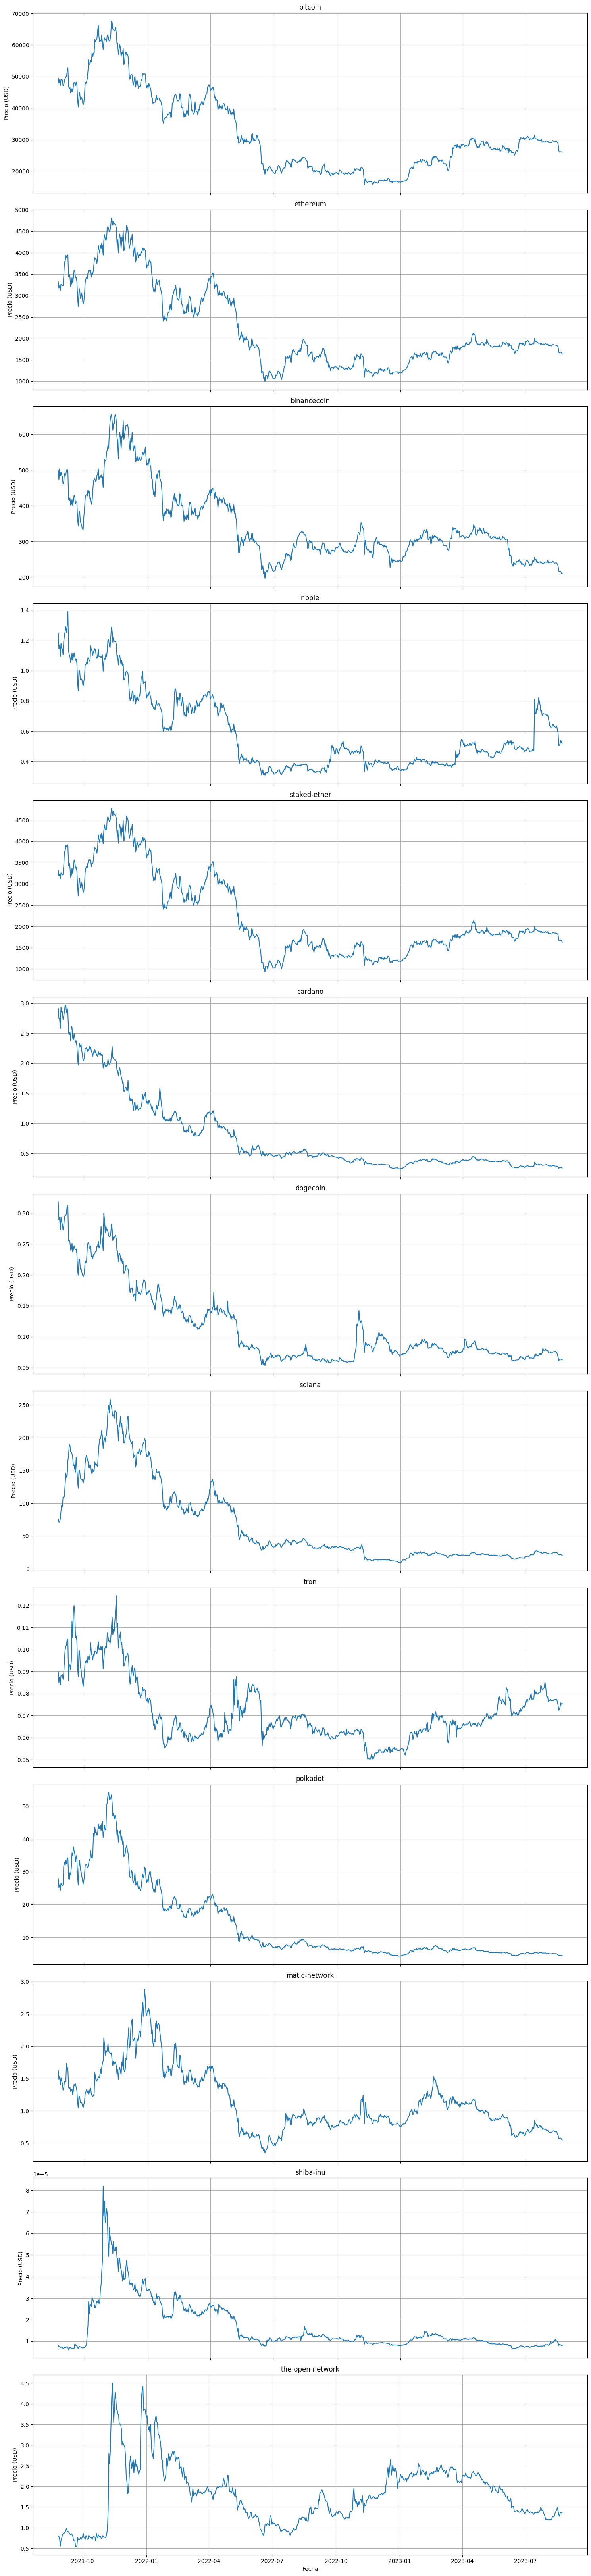

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 5*len(df.columns)))

for i, column in enumerate(df.columns):
    axes[i].plot(df.index, df[column], label=column)
    axes[i].set_title(column)
    axes[i].set_ylabel("Precio (USD)")
    axes[i].grid(True)
    if i != len(df.columns) - 1:
        axes[i].set_xticklabels([])  # Esconde las etiquetas del eje x para todos excepto el último subplot
    else:
        axes[i].set_xlabel("Fecha")

plt.tight_layout()
plt.show()


Podemos ver que, salvando algunas diferencias, las 10 monedas tienen un comportamiento muy similar, esto lo podemos verificar mediante un HeatMap.

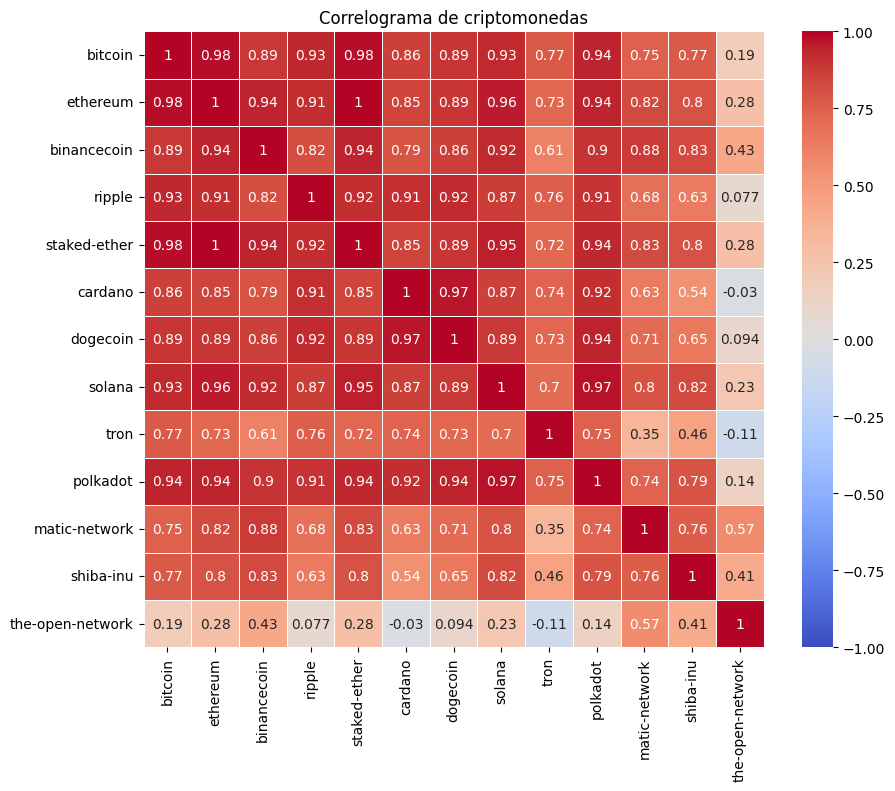

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crea el correlograma con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

# Título y mostrar el gráfico
plt.title("Correlograma de criptomonedas")
plt.show()


La correlacion entre los precios de las distintas monedas esta fuertemente relacionado entre si, esto nos puede indicar que, aunque con algunas diferencias, todas las monedas en general siguen una tendencia en general similar.


Liderazgo de Bitcoin: A menudo, Bitcoin actúa como un indicador líder en el mercado de criptomonedas. Cuando Bitcoin tiene un movimiento de precio significativo, otras criptomonedas pueden seguir su tendencia.

Vemos por ejemplo que las dos grandes monedas (Bitcoin y ETH) tiene un comportamiento practimanete de espejo con una correlacion de 0.98, osea que analizar el comportamiento de una u otra es similar.

Algo similar pasa entre Solada y Polkadot con una correlacion de 0.97.

Staked-ether con una correlacion de 1 con Etherum, vemos que ambas son la misma moneda, podemos entonces luego reemplazarla con otra.

Conclusiones iniciales:

- Diversificación: Si estás buscando diversificar tu cartera para reducir el riesgo, es posible que no quieras tener activos que estén fuertemente correlacionados. En este caso, tener tanto BTC como ETH podría no ofrecerte la diversificación que deseas.

- Predicción: Si una moneda, como Bitcoin, tiende a liderar los movimientos del mercado, algunos traders podrían usar cambios en el precio de Bitcoin como una señal para anticipar movimientos en otras monedas correlacionadas.

Con este analizis vamos a descartar las monedas Staked-Ether y polkadot, no se descarta Etherum por mas que tenga una fuerte relacion con Bitcoin debido, como se esta haciendo un analisis de criptomonedas, seria ilogico que cualquiera de las dos no este presente ya que son las dos monedas referentes de este mundo. Incluso alguien que no conoce nada sobre criptomonedas es muy probable que conozca o haya escuchado hablar de alguna de estas dos monedas.

In [ ]:
# Descartar las columnas staked-ether y polkadot
df = df.drop(columns=['staked-ether', 'polkadot'])

In [ ]:
cryptos = (df.columns.tolist())[0:10]

## Maximo de cada moneda

Vamos a ver la fecha en la que las monedas tocaron su maximo historico

In [ ]:
# Encuentra la fecha de precio máximo para cada moneda
max_dates = df.idxmax()

# Imprime las fechas de los máximos
for coin, date in max_dates.items():
    print(f"La moneda {coin} alcanzó su máximo el {date.strftime('%d-%m-%Y')}")


La moneda bitcoin alcanzó su máximo el 09-11-2021
La moneda ethereum alcanzó su máximo el 09-11-2021
La moneda binancecoin alcanzó su máximo el 15-11-2021
La moneda ripple alcanzó su máximo el 07-09-2021
La moneda cardano alcanzó su máximo el 04-09-2021
La moneda dogecoin alcanzó su máximo el 24-08-2021
La moneda solana alcanzó su máximo el 07-11-2021
La moneda tron alcanzó su máximo el 16-11-2021
La moneda matic-network alcanzó su máximo el 27-12-2021
La moneda shiba-inu alcanzó su máximo el 28-10-2021
La moneda the-open-network alcanzó su máximo el 13-11-2021


De las monedas presentes 6 tuvieron su maximo entorno al 09-11-2021, fecha en la que bitcoin alcanzo tambien su maximo historico.



## Relacion del precio y otras variables

Seria interesante analizar la relacion entre otras variables como el volumen de transacciones, la capitalizacion del mercado, la oferta de monedas en circulacion y alguna otra metrica disponible en la API de coingecko

In [ ]:
data = []

for crypto in cryptos:
    coin_data = cg.get_coin_by_id(crypto)
    
    data.append({
        "name": coin_data['name'],
        "symbol": coin_data['symbol'],
        "market_cap": coin_data['market_data']['market_cap']['usd'],
        "volume": coin_data['market_data']['total_volume']['usd'],
        "current_price": coin_data['market_data']['current_price']['usd'],
        "high_24h": coin_data['market_data']['high_24h']['usd'],
        "low_24h": coin_data['market_data']['low_24h']['usd'],
        "price_change_24h": coin_data['market_data']['price_change_24h'],
        "market_cap_rank": coin_data['market_cap_rank'],
        "last_updated": coin_data['last_updated']
    })

df = pd.DataFrame(data)


In [ ]:
df

,name,symbol,market_cap,volume,current_price,high_24h,low_24h,price_change_24h,market_cap_rank,last_updated
0,Bitcoin,btc,507671236911,8552381939,26042.000000,26155.000000,25575.000000,-5.901442e+00,1,2023-08-23T02:00:48.434Z
1,Ethereum,eth,196757951145,10271668464,1634.080000,1667.130000,1597.410000,-2.927142e+01,2,2023-08-23T02:00:26.552Z
2,BNB,bnb,32953942869,791241083,213.960000,214.430000,204.210000,3.906128e+00,4,2023-08-23T02:00:18.009Z
3,XRP,xrp,27541841010,1096447025,0.520293,0.522361,0.507130,2.818800e-04,5,2023-08-23T02:00:14.303Z
4,Cardano,ada,9108134816,203111047,0.259671,0.262623,0.250525,-2.151106e-03,8,2023-08-23T01:59:47.872Z
5,Dogecoin,doge,8847563420,315429388,0.062753,0.063199,0.060500,1.244100e-04,9,2023-08-23T02:00:06.817Z
6,Solana,sol,8426852153,436318475,20.590000,21.190000,19.660000,-5.413442e-01,10,2023-08-23T02:00:41.368Z
7,TRON,trx,6798163756,169254884,0.076045,0.076049,0.074463,9.273800e-04,11,2023-08-23T02:00:08.526Z
8,Polygon,matic,5127829491,336820182,0.548893,0.556443,0.529131,-6.723935e-03,13,2023-08-23T02:00:23.963Z
9,Shiba Inu,shib,4803347106,181466861,0.000008,0.000008,0.000008,2.180490e-07,14,2023-08-23T02:00:24.051Z


In [ ]:
history_data = []

for crypto in cryptos:
    historical_data = cg.get_coin_market_chart_by_id(id=crypto, vs_currency="usd", days="730", interval="daily")
    
    # Precios, volúmenes y market cap
    prices = historical_data['prices']
    volumes = historical_data['total_volumes']
    market_caps = historical_data['market_caps']
    
    for i in range(len(prices)):
        history_data.append({
            "name": crypto,
            "timestamp": prices[i][0],
            "price": prices[i][1],
            "volume": volumes[i][1],
            "market_cap": market_caps[i][1]
        })

df_history = pd.DataFrame(history_data)


In [ ]:
df_history['date'] = pd.to_datetime(df_history['timestamp'], unit='ms')


Vamos a agregar indicadores tecnicos como RSI, MACD, MA

In [ ]:
import pandas as pd
import ta

# Creamos una lista para almacenar los dataframes procesados
dfs_processed = []

# Obtenemos la lista de monedas únicas en el dataframe
unique_coins = df_history['name'].unique()

for coin in unique_coins:
    df_coin = df_history[df_history['name'] == coin].copy()
    
    # Calculamos medias móviles
    df_coin['SMA_50'] = ta.trend.SMAIndicator(close=df_coin['price'], window=50).sma_indicator()
    df_coin['SMA_100'] = ta.trend.SMAIndicator(close=df_coin['price'], window=100).sma_indicator()
    df_coin['EMA_50'] = ta.trend.EMAIndicator(close=df_coin['price'], window=50).ema_indicator()
    df_coin['EMA_100'] = ta.trend.EMAIndicator(close=df_coin['price'], window=100).ema_indicator()
    
    # MACD
    macd_indicator = ta.trend.MACD(close=df_coin['price'], window_slow=26, window_fast=12, window_sign=9)
    df_coin['MACD'] = macd_indicator.macd()
    df_coin['MACD_Signal'] = macd_indicator.macd_signal()
    
    # RSI
    df_coin['RSI'] = ta.momentum.RSIIndicator(close=df_coin['price'], window=14).rsi()
    
    dfs_processed.append(df_coin)

# Concatenamos los dataframes procesados
df_final = pd.concat(dfs_processed, ignore_index=True)

print(df_final.head())




      name      timestamp         price        volume    market_cap  \
0  bitcoin  1629763200000  49518.577488  3.580026e+10  9.307292e+11   
1  bitcoin  1629849600000  47940.607915  3.838715e+10  9.024895e+11   
2  bitcoin  1629936000000  49002.703766  3.351733e+10  9.213282e+11   
3  bitcoin  1630022400000  47229.070651  3.377486e+10  8.878321e+11   
4  bitcoin  1630108800000  49083.103306  3.460787e+10  9.229698e+11   

        date  SMA_50  SMA_100  EMA_50  EMA_100  MACD  MACD_Signal  RSI  
0 2021-08-24     NaN      NaN     NaN      NaN   NaN          NaN  NaN  
1 2021-08-25     NaN      NaN     NaN      NaN   NaN          NaN  NaN  
2 2021-08-26     NaN      NaN     NaN      NaN   NaN          NaN  NaN  
3 2021-08-27     NaN      NaN     NaN      NaN   NaN          NaN  NaN  
4 2021-08-28     NaN      NaN     NaN      NaN   NaN          NaN  NaN  


In [ ]:
# Agregar Simple Moving Averages (SMA)
df_final['SMA_20'] = df_final.groupby('name')['price'].transform(lambda x: x.rolling(window=20).mean())

# Agregar Exponential Moving Averages (EMA)
df_final['EMA_20'] = df_final.groupby('name')['price'].transform(lambda x: x.ewm(span=20, adjust=False).mean())

# Calculando el On-Balance Volume (OBV)
df_final['OBV'] = df_final.groupby('name')['volume'].transform(lambda x: (x.where(x > x.shift(1), 1).where(x < x.shift(1), -1).cumsum()).fillna(0))

df_final['SIGNAL'] = df_final['MACD'].ewm(span=9).mean()




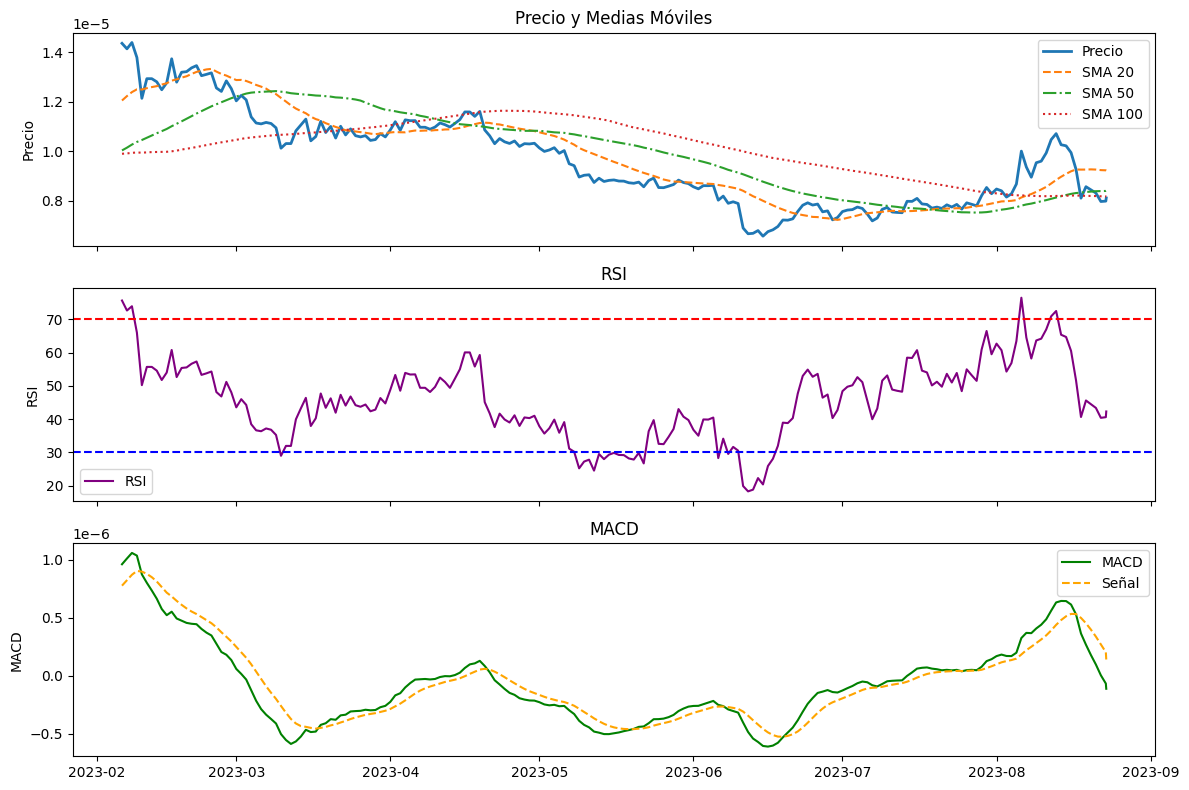

In [ ]:
import matplotlib.pyplot as plt

# Filtramos los últimos 200 registros
df_plot = df_final.tail(200)

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 8), sharex=True)

# Gráfico del precio y medias móviles en ax1
ax1.plot(df_plot['date'], df_plot['price'], label='Precio', linewidth=2)
ax1.plot(df_plot['date'], df_plot['SMA_20'], label='SMA 20', linestyle='--')
ax1.plot(df_plot['date'], df_plot['SMA_50'], label='SMA 50', linestyle='-.')
ax1.plot(df_plot['date'], df_plot['SMA_100'], label='SMA 100', linestyle=':')
ax1.set_title('Precio y Medias Móviles')
ax1.set_ylabel('Precio')
ax1.legend()

# Gráfico RSI en ax2
ax2.plot(df_plot['date'], df_plot['RSI'], label='RSI', color='purple')
ax2.axhline(70, color='red', linestyle='--')
ax2.axhline(30, color='blue', linestyle='--')
ax2.set_title('RSI')
ax2.set_ylabel('RSI')
ax2.legend()

# Gráfico MACD y Señal en ax3
ax3.plot(df_plot['date'], df_plot['MACD'], label='MACD', color='green')
ax3.plot(df_plot['date'], df_plot['SIGNAL'], label='Señal', color='orange', linestyle='--')
ax3.set_title('MACD')
ax3.set_ylabel('MACD')
ax3.legend()

plt.tight_layout()
plt.show()



## Volatilidad

La volatilidad es una medida de la variabilidad en los precios de un activo financiero. En el contexto de las criptomonedas, se refiere a la rapidez y magnitud con las que sus precios pueden cambiar en un corto período de tiempo. Una alta volatilidad puede significar mayores oportunidades de ganancia, pero también implica un mayor riesgo de pérdida.

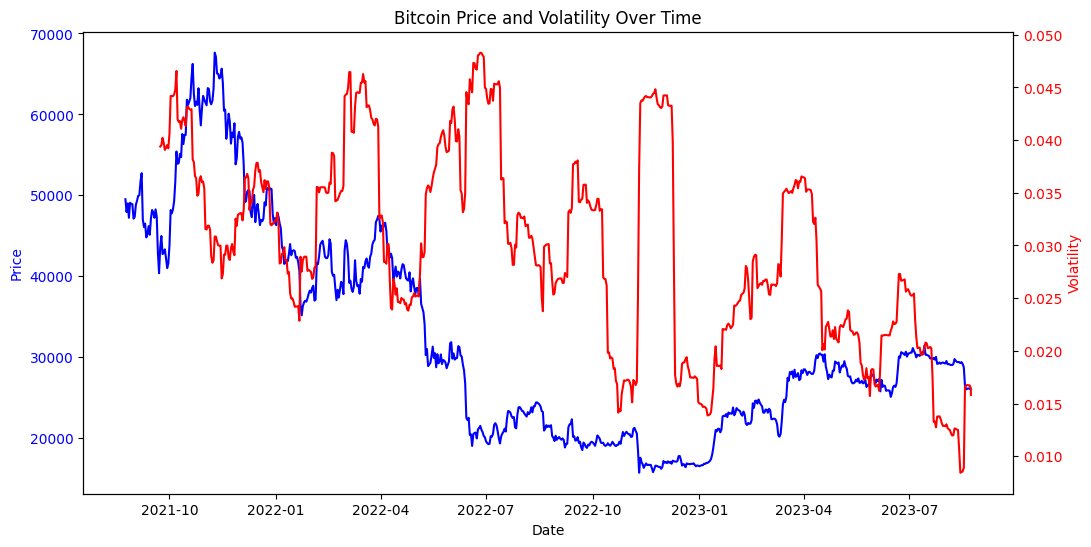

In [ ]:
# Filtrar el df_final para obtener solo los datos de Bitcoin
df_bitcoin = df_final[df_final['name'] == 'bitcoin'].copy()

# Calcular Rendimientos Diarios
df_bitcoin['daily_return'] = df_bitcoin['price'].pct_change()

# Calcular la Volatilidad (usaremos una ventana de 30 días como estándar)
df_bitcoin['volatility'] = df_bitcoin['daily_return'].rolling(window=30).std()

# Agregar la Volatilidad al DataFrame (ya está hecho en el paso anterior)

# Visualización

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='blue')
ax1.plot(df_bitcoin['date'], df_bitcoin['price'], color='blue', label='Price')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volatility', color='red')
ax2.plot(df_bitcoin['date'], df_bitcoin['volatility'], color='red', label='Volatility')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Bitcoin Price and Volatility Over Time')
plt.show()


Podemos utilizar una metrica conocida como "bandas de Boolinger" como un estimador de la volatilidad de las criptomonedas, cuanto mas anchas sean estan bandas mas volatil es.

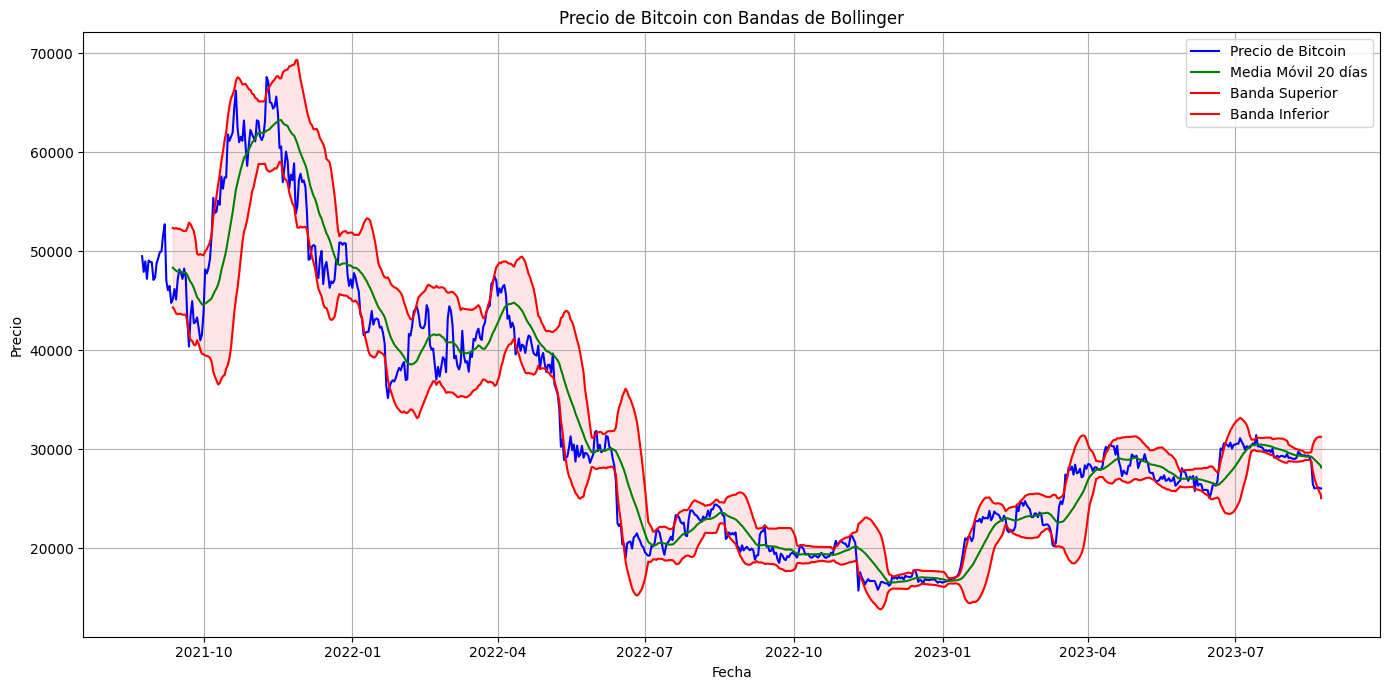

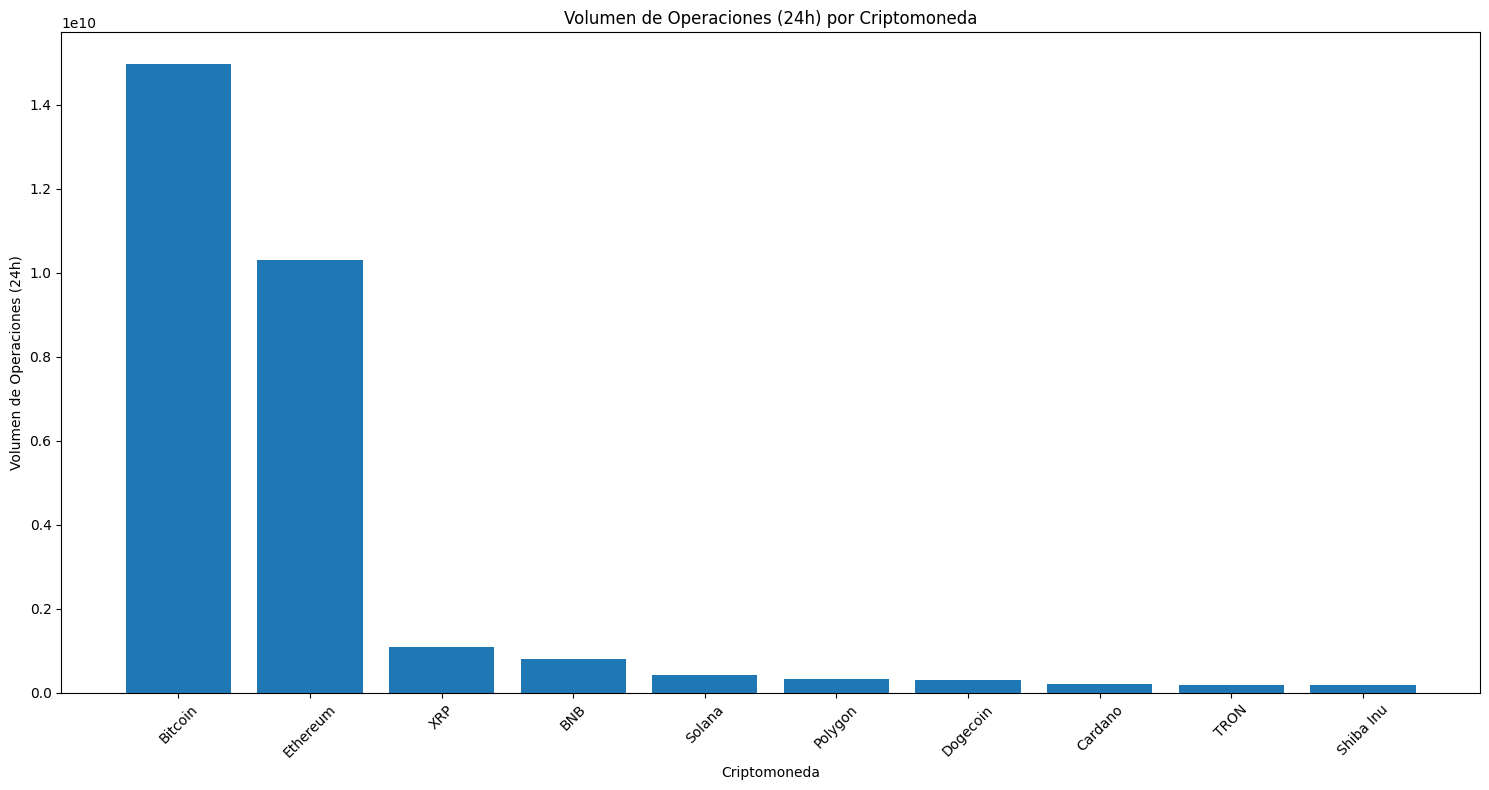

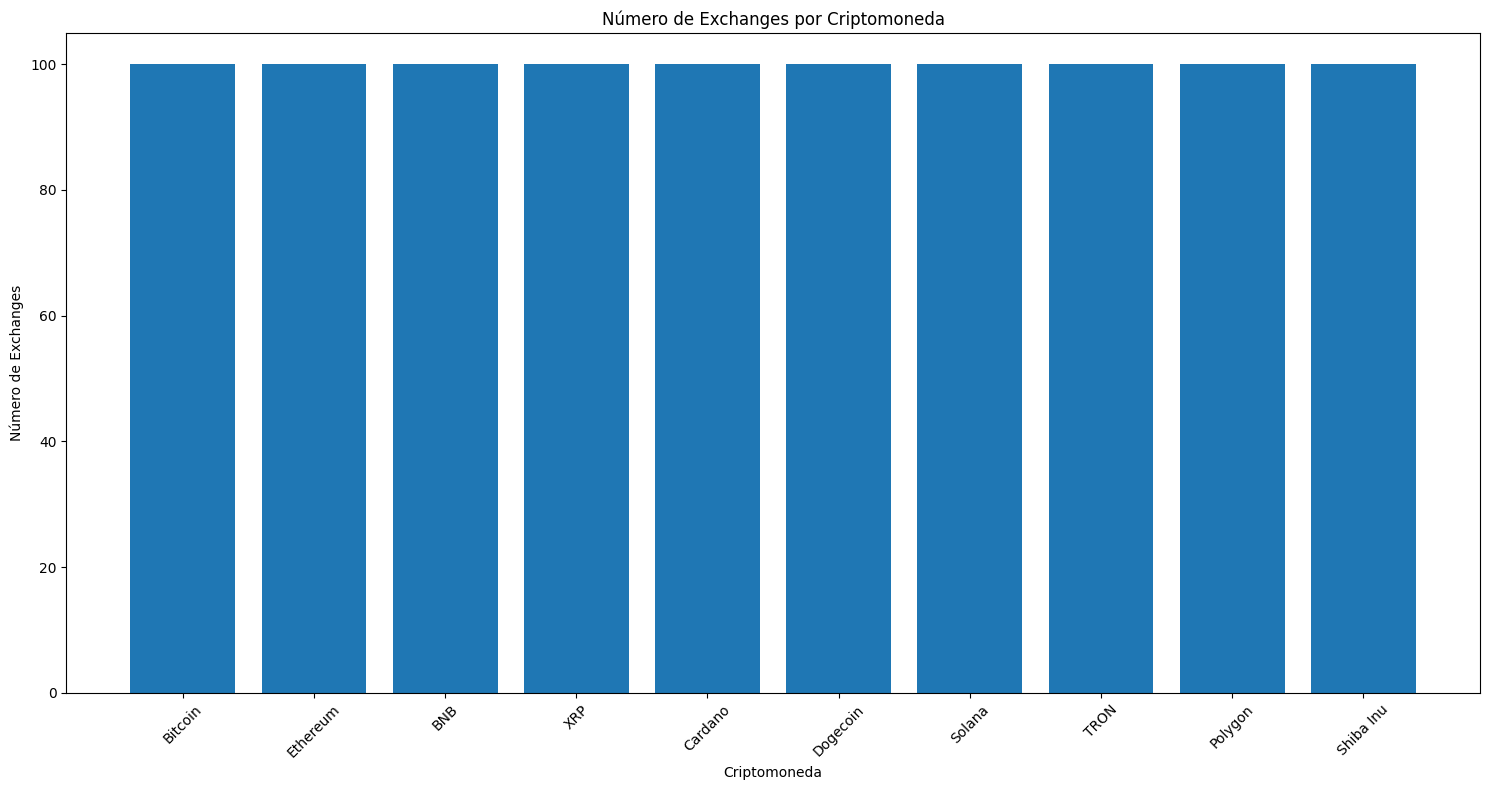

In [ ]:
# Filtrar sólo los datos de Bitcoin
df_bitcoin = df_final[df_final['name'] == 'bitcoin'].copy()

# Calcular la SMA de 20 días
df_bitcoin['SMA20'] = df_bitcoin['price'].rolling(window=20).mean()

# Calcular la desviación estándar de 20 días
df_bitcoin['STD20'] = df_bitcoin['price'].rolling(window=20).std()

# Calcular la Banda Superior e Inferior
df_bitcoin['Upper_Bollinger'] = df_bitcoin['SMA20'] + (df_bitcoin['STD20'] * 2)
df_bitcoin['Lower_Bollinger'] = df_bitcoin['SMA20'] - (df_bitcoin['STD20'] * 2)
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(14,7))
plt.plot(df_bitcoin['date'], df_bitcoin['price'], label='Precio de Bitcoin', color='blue')
plt.plot(df_bitcoin['date'], df_bitcoin['SMA20'], label='Media Móvil 20 días', color='green')
plt.plot(df_bitcoin['date'], df_bitcoin['Upper_Bollinger'], label='Banda Superior', color='red')
plt.plot(df_bitcoin['date'], df_bitcoin['Lower_Bollinger'], label='Banda Inferior', color='red')
plt.fill_between(df_bitcoin['date'], df_bitcoin['Lower_Bollinger'], df_bitcoin['Upper_Bollinger'], color='red', alpha=0.1)
plt.title('Precio de Bitcoin con Bandas de Bollinger')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
import requests
import pandas as pd

# Lista vacía para almacenar los datos de cada criptomoneda
data_list = []

# Recorrer cada criptomoneda y obtener las métricas de CoinGecko
for crypto in cryptos:
    url = f"https://api.coingecko.com/api/v3/coins/{crypto}"
    response = requests.get(url)
    data = response.json()

    data_list.append({
        "name": data["name"],
        "volume_24h": data["market_data"]["total_volume"]["usd"],
        "num_exchanges": len(data["tickers"]),
        "market_cap": data["market_data"]["market_cap"]["usd"],
        "volume_to_marketcap_ratio": data["market_data"]["total_volume"]["usd"] / data["market_data"]["market_cap"]["usd"]
    })

# Convertir la lista de datos en un DataFrame
liquidity_df = pd.DataFrame(data_list)

# Ordenar el dataframe por volumen para una mejor visualización
liquidity_df_sorted = liquidity_df.sort_values(by='volume_24h', ascending=False)

# Gráfico de barras para Volumen 24h
plt.figure(figsize=(15, 8))
plt.bar(liquidity_df_sorted['name'], liquidity_df_sorted['volume_24h'])
plt.title('Volumen de Operaciones (24h) por Criptomoneda')
plt.xlabel('Criptomoneda')
plt.ylabel('Volumen de Operaciones (24h)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()# Ordenar el dataframe por número de exchanges
liquidity_df_sorted = liquidity_df.sort_values(by='num_exchanges', ascending=False)

# Gráfico de barras para Número de Exchanges
plt.figure(figsize=(15, 8))
plt.bar(liquidity_df_sorted['name'], liquidity_df_sorted['num_exchanges'])
plt.title('Número de Exchanges por Criptomoneda')
plt.xlabel('Criptomoneda')
plt.ylabel('Número de Exchanges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_final.to_excel('data_crypto.xlsx')